In [8]:
import seaborn as sns
sns.set()
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import imrotate as imgrot

In [9]:
dim = 64
def rect_generator(center_x, center_y, scale,angle=0, d = 1):
    size = dim
    data = np.zeros((size,size))
    lb_x = center_x-scale 
    ub_x = center_x+scale
    lb_y = center_y-scale 
    ub_y = center_y+scale
#     data[lb-d:ub+d,lb-d:ub+d]=1
#     data[lb+d:ub-d,lb+d:ub-d]=0
    data[lb_x-d:ub_x+d,lb_y-d:ub_y+d]=1
    data[lb_x:ub_x,lb_y:ub_y]=0
    data = imgrot(data, angle, interp='bicubic')
    return data

def crs_generator(center_x, center_y, scale, angle=0, d=1):
    size = dim
    data = np.zeros((size,size))
    lb_x = center_x-scale 
    ub_x = center_x+scale
    lb_y = center_y-scale 
    ub_y = center_y+scale
    data[lb_x:ub_x,center_y-d:center_y+d]=1
    data[center_x-d:center_x+d,lb_y:ub_y]=1
    data = imgrot(data, angle, interp='bicubic')
    return data

def rectcrs_generator(center_x, center_y, scale,angle=0, d=1):
    size = dim
    data = np.zeros((size,size))
    lb_x = center_x-scale 
    ub_x = center_x+scale
    lb_y = center_y-scale 
    ub_y = center_y+scale
    data[lb_x-d:ub_x+d,lb_y-d:ub_y+d]=1
    data[lb_x:ub_x,lb_y:ub_y]=0
    
    lb_x = center_x-scale 
    ub_x = center_x+scale
    lb_y = center_y-scale 
    ub_y = center_y+scale
    data[lb_x:ub_x,center_y-d:center_y+d]=1
    data[center_x-d:center_x+d,lb_y:ub_y]=1
    data = imgrot(data, angle, interp='bicubic')
    return data

def sph_generator(center_x, center_y, scale, angle=0, d=1):
    from skimage.draw import circle_perimeter
    img = np.zeros((dim, dim), dtype=np.uint8)
    rr, cc = circle_perimeter(center_x, center_y, scale)
    img[rr, cc] = 1
    rr, cc = circle_perimeter(center_x, center_y, scale-d)
    img[rr, cc] = 1
#     plt.imshow(img)
    img = imgrot(img, angle, interp='bicubic')
    return img

In [122]:
rect_z

array([[ 0, 21],
       [ 0, 18],
       [ 0, 16],
       ..., 
       [19, 21],
       [19, 18],
       [19, 16]])

In [123]:
rect_img = []
rect_label = []
rect_z = []
cross_img = []
cross_label = []
cross_z = []
rectcrs_img = []
rectcrs_label = []
rectcrs_z = []
sph_img = []
sph_label = []
sph_z = []

import itertools
dim = 64
center_x = center_y = [dim/2-3,dim/2-2,dim/2-1,dim/2,dim/2+1,dim/2+2,dim/2+3]
centers = list(itertools.product(center_x, center_y))
# centers = [(29,29)]

for rot in range(0,20):
    for center in centers:
        for d in range(1,5):
            center_x, center_y = center
            ########################
            data = rect_generator(center_x, center_y, np.int(dim/3), rot-10, d*2)
            rect_img = rect_img + [data.reshape(dim*dim)]
            rect_label = rect_label + [np.asarray([0,1])]
            rect_z = rect_z + [np.asarray([rot,d*2])]
            
            data = rect_generator(center_x, center_y, np.int(dim/3.5), rot-10, d*2)
            rect_img = rect_img + [data.reshape(dim*dim)]
            rect_label = rect_label + [np.asarray([0,1])]
            rect_z = rect_z + [np.asarray([rot,d*2])]
            
            data = rect_generator(center_x, center_y, np.int(dim/4), rot-10, d*2)
            rect_img = rect_img + [data.reshape(dim*dim)]
            rect_label = rect_label + [np.asarray([0,1])]
            rect_z = rect_z + [np.asarray([rot,d*2])]

            ########################
            data = crs_generator(center_x, center_y, np.int(dim/3), rot-10, d)
            cross_img = cross_img + [data.reshape(dim*dim)]
            cross_label = cross_label + [np.asarray([1,0])]
            cross_z = cross_z + [np.asarray([rot,d])]
            
            data = crs_generator(center_x, center_y, np.int(dim/3.5), rot-10, d)
            cross_img = cross_img + [data.reshape(dim*dim)]
            cross_label = cross_label + [np.asarray([1,0])]
            cross_z = cross_z + [np.asarray([rot,d])]
            
            data = crs_generator(center_x, center_y, np.int(dim/4), rot-10, d)
            cross_img = cross_img + [data.reshape(dim*dim)]
            cross_label = cross_label + [np.asarray([1,0])]
            cross_z = cross_z + [np.asarray([rot,d])]

            ########################
            data = rectcrs_generator(center_x, center_y, np.int(dim/3), rot-10, d)
            rectcrs_img = rectcrs_img + [data.reshape(dim*dim)]
            rectcrs_label = rectcrs_label + [np.asarray([1,0])]
            rectcrs_z = rectcrs_z + [np.asarray([rot,d])]
            
            data = rectcrs_generator(center_x, center_y, np.int(dim/3.5), rot-10, d)
            rectcrs_img = rectcrs_img + [data.reshape(dim*dim)]
            rectcrs_label = rectcrs_label + [np.asarray([1,0])]
            rectcrs_z = rectcrs_z + [np.asarray([rot,d])]
            
            data = rectcrs_generator(center_x, center_y, np.int(dim/4), rot-10, d)
            rectcrs_img = rectcrs_img + [data.reshape(dim*dim)]
            rectcrs_label = rectcrs_label + [np.asarray([1,0])]
            rectcrs_z = rectcrs_z + [np.asarray([rot, d])]

#             ########################
#             data = sph_generator(center_x, center_y,  np.int(dim/3/2), 0, d)
#             sph_img = sph_img + [data.reshape(dim*dim)]
#             sph_label = sph_label + [np.asarray([1,0])]
#             sph_z = sph_z + [np.asarray([rot,np.int(dim/3)])]
            
#             data = sph_generator(center_x, center_y,  np.int(dim/3.5/2), 0, d)
#             sph_img = sph_img + [data.reshape(dim*dim)]
#             sph_label = sph_label + [np.asarray([1,0])]
#             sph_z = sph_z + [np.asarray([rot,np.int(dim/3.5)])]

#             data = sph_generator(center_x, center_y,  np.int(dim/4/2), 0, d)
#             sph_img = sph_img + [data.reshape(dim*dim)]
#             sph_label = sph_label + [np.asarray([1,0])]
#             sph_z = sph_z + [np.asarray([rot,np.int(dim/4)])]

rect_img = np.asarray(rect_img)
rect_label = np.asarray(rect_label)
rect_z = np.asarray(rect_z)
cross_img = np.asarray(cross_img)
cross_label = np.asarray(cross_label)
cross_z = np.asarray(cross_z)
rectcrs_img = np.asarray(rectcrs_img)
rectcrs_label = np.asarray(rectcrs_label)
rectcrs_z = np.asarray(rectcrs_z)
sph_img = np.asarray(sph_img)
sph_label = np.asarray(sph_label)
sph_z = np.asarray(sph_z)
dictionary = {'rect_img':rect_img,'rect_label':rect_label,'rect_z':rect_z,
              'cross_img':cross_img,'cross_label':cross_label, 'cross_z':cross_z,
              'rectcrs_img':rectcrs_img,'rectcrs_label':rectcrs_label, 'rectcrs_z':rectcrs_z,
              'sph_img':sph_img,'sph_label':sph_label, 'sph_z':sph_z}
np.save('rec_crs.npy', dictionary)

In [190]:
# %reset
import numpy as np
from random import sample

nn = np.load('rec_crs.npy')
dim = 64

crs = nn.item()['rectcrs_img']#['cross_img']
crs = crs.reshape(crs.shape[0],1,dim,dim)
crs_label = [[1,1]+[0]*0] * crs.shape[0]
crs_z = nn.item()['rectcrs_z']
crs_z = crs_z.reshape(crs.shape[0],2)

rec = nn.item()['rect_img']
rec = rec.reshape(rec.shape[0],1,dim,dim)
rec_label = [[0,1]+[0]*0] * rec.shape[0]
rec_z = nn.item()['rect_z']
rec_z = rec_z.reshape(crs.shape[0],2)

data = np.append(crs,rec,0)
label = np.append(crs_label,rec_label,0)
label_z = np.append(crs_z,rec_z,0)
label_z = label_z.astype('float32')
label_z[:,0] = (label_z[:,0]-np.min(label_z[:,0])) * 1.0 / (np.max(label_z[:,0])-np.min(label_z[:,0]))
label_z[:,1] = (label_z[:,1]-np.min(label_z[:,1])) * 1.0 / (np.max(label_z[:,1])-np.min(label_z[:,1]))

# ttn = 128*4
# data = [datas[len(datas)/ttn*i] for i in range(ttn) ]
# label = [labels[len(datas)/ttn*i] for i in range(ttn) ]
data = np.asarray(data)
label = np.asarray(label)
label_z = np.asarray(label_z)

split = 0.2
l = len(data) #length of data
n1 = int(split*l)  # split for testing
n2 = l - n1
indices = sample(range(l),n1)

data_test = data[indices]
label_test = label[indices]
label_z_test = label_z[indices]

data_train = np.delete(data,indices,0)
label_train = np.delete(label,indices,0)
label_z_train = np.delete(label_z,indices,0)


In [202]:
# %reset
import h5py

train_features = []
train_targets = []
train_z = []
test_features = []
test_targets = []
train_z = []
test_z = []
for index, array in enumerate(data_train):
    train_features.append(array.reshape(array.shape[0],array.shape[1],array.shape[2]))
    train_targets.append(label_train[index])
    train_z.append(label_z_train[index])
for index, array in enumerate(data_test):
    test_features.append(array.reshape(array.shape[0],array.shape[1],array.shape[2]))
    test_targets.append(label_test[index])
    test_z.append(label_z_test[index])

train_features = np.array(train_features)
train_targets = np.array(train_targets) #starts from 0
train_z = np.array(train_z)
test_features = np.array(test_features)
test_targets = np.array(test_targets)
test_z = np.array(test_z)
train_n, c, p1, p2 = train_features.shape
test_n = test_features.shape[0]
n = train_n + test_n

f = h5py.File('rectcrs_z.hdf5', mode='w')
features = f.create_dataset('features', (n, c, p1, p2), dtype='float32')
m = 2
targets = f.create_dataset('targets', (n, m), dtype='float32')
z = f.create_dataset('z', (n, m), dtype='float32')

features[...] = np.vstack([train_features, test_features])
targets[...] = np.vstack([train_targets, test_targets]).reshape(n,m)
z[...] = np.vstack([train_z, test_z]).reshape(n,m)

features.dims[0].label = 'batch'
features.dims[1].label = 'channel'
features.dims[2].label = 'height'
features.dims[3].label = 'width'
targets.dims[0].label = 'batch'
targets.dims[1].label = 'targets'
z.dims[0].label = 'batch'
z.dims[1].label = 'targets'


from fuel.datasets.hdf5 import H5PYDataset
split_dict = {
    'train': {'features': (0, train_n), 'targets': (0, train_n), 'z': (0, train_n)},
    'valid': {'features': (train_n, n), 'targets': (train_n, n), 'z': (train_n, n)}}
# split_dict = {
#     'train': {'features': (0, train_n), 'targets': (0, train_n)},
#     'valid': {'features': (train_n, n), 'targets': (train_n, n)}}
f.attrs['split'] = H5PYDataset.create_split_array(split_dict)

f.flush()
f.close()

In [203]:
import h5py
from random import sample
import numpy as np
f = h5py.File("rectcrs_z.hdf5", "r")
# f = h5py.File(datadir + "/rect_rectcrs0.hdf5", "r")
data_key = f.keys()[0]
data = np.asarray(f[data_key], dtype='float32')  # normalized into (-1, 1)
# data = (np.asarray(f[data_key],dtype='float32') / 255. - 0.5 )*2 # normalized into (-1, 1)
# data = data.transpose((0,2,3,1))
label_key = f.keys()[1]
label = np.asarray(f[label_key])
z_key = f.keys()[2]
z = np.asarray(f[z_key])

split = 0.1
l = len(data)  # length of data
n1 = int(split * l)  # split for testing
indices = [1,-2,3,-4,5,-6,7,-8,9,-10,11,-12,13,-14,15,-16]#sample(range(l), n1)

x_test = data[indices]
y_test = label[indices]
z_test = z[indices]
x_train = np.delete(data, indices, 0)
y_train = np.delete(label, indices, 0)
z_train = np.delete(z, indices, 0)


/home/hope-yao/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:23: FutureWarning: in the future negative indices will not be ignored by `numpy.delete`.
/home/hope-yao/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:24: FutureWarning: in the future negative indices will not be ignored by `numpy.delete`.
/home/hope-yao/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:25: FutureWarning: in the future negative indices will not be ignored by `numpy.delete`.


In [16]:
from scipy.io import loadmat #be used to get data from .mat document 
tmpdata = loadmat('/home/hope-yao/Documents/Data/Ti_hope.mat')
x = tmpdata['xtr_store']
data = x.reshape(200,200,1,1000).transpose(3,0,1,2)
data = data[:,4:196,4:196,:]

import numpy as np
from random import sample
split = 0.2
l = len(data) #length of data
n1 = int(split*l)  # split for testing
n2 = l - n1
indices = sample(range(l),n1)

data_test = data[indices]
data_train = np.delete(data,indices,0)

# %reset
import h5py
train_features = []
test_features = []
for index, array in enumerate(data_train):
    train_features.append(array.reshape(array.shape[0],array.shape[1],array.shape[2]))
for index, array in enumerate(data_test):
    test_features.append(array.reshape(array.shape[0],array.shape[1],array.shape[2]))

train_features = np.array(train_features)
test_features = np.array(test_features)
train_n, c, p1, p2 = train_features.shape
test_n = test_features.shape[0]
n = train_n + test_n

f = h5py.File('Ti_hope.hdf5', mode='w')
features = f.create_dataset('features', (n, c, p1, p2), dtype='float32')
features[...] = np.vstack([train_features, test_features])

features.dims[0].label = 'batch'
features.dims[1].label = 'channel'
features.dims[2].label = 'height'
features.dims[3].label = 'width'

from fuel.datasets.hdf5 import H5PYDataset
split_dict = {
    'train': {'features': (0, train_n)},
    'valid': {'features': (train_n, n)}}
f.attrs['split'] = H5PYDataset.create_split_array(split_dict)
f.flush()
f.close()

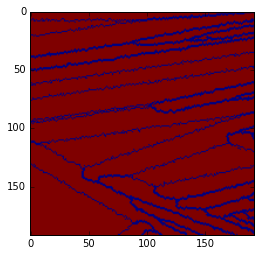

(1000, 192, 192, 1)

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(data[0,:,:,0])
plt.show()
data.shape

In [94]:
%reset 

import tensorflow as tf
slim = tf.contrib.slim
import numpy as np
fc_size = 12 * 2


def GeneratorCNN(z, hidden_num, output_num, repeat_num, data_format, reuse):
    with tf.variable_scope("G", reuse=reuse) as vs:
        x = slim.fully_connected(z, np.prod([fc_size, fc_size, hidden_num]), activation_fn=None)
        x = reshape(x, fc_size, fc_size, hidden_num, data_format)
        
        for idx in range(repeat_num):
            x = slim.conv2d(x, hidden_num, 3, 1, activation_fn=tf.nn.elu, data_format=data_format)
            x = slim.conv2d(x, hidden_num, 3, 1, activation_fn=tf.nn.elu, data_format=data_format)
            if idx < repeat_num - 1:
                x = upscale(x, 2, data_format)

        out = slim.conv2d(x, output_num, 3, 1, activation_fn=None, data_format=data_format)

    variables = tf.contrib.framework.get_variables(vs)
    return out, variables

def DiscriminatorCNN(x, input_channel, z_num, repeat_num, hidden_num, data_format):
    with tf.variable_scope("D") as vs:
        # Encoder
        x = slim.conv2d(x, hidden_num, 3, 1, activation_fn=tf.nn.relu, data_format=data_format)

        prev_channel_num = hidden_num
        for idx in range(repeat_num):
            channel_num = hidden_num * (idx + 1)
            x = slim.conv2d(x, channel_num, 3, 1, activation_fn=tf.nn.relu, data_format=data_format)
            x = slim.conv2d(x, channel_num, 3, 1, activation_fn=tf.nn.relu, data_format=data_format)
            if idx < repeat_num - 1:
                # x = slim.conv2d(x, channel_num, 3, 2, activation_fn=tf.nn.elu, data_format=data_format)
                x = tf.contrib.layers.max_pool2d(x, [2, 2], [2, 2], padding='VALID', data_format=data_format)

        x = tf.reshape(x, [-1, np.prod([fc_size, fc_size, channel_num])])
        z = x = slim.fully_connected(x, z_num, activation_fn=None)

        # Decoder
        x = slim.fully_connected(x, np.prod([fc_size, fc_size, hidden_num]), activation_fn=None)
        x = reshape(x, fc_size, fc_size, hidden_num, data_format)
        
        for idx in range(repeat_num):
            x = slim.conv2d(x, hidden_num, 3, 1, activation_fn=tf.nn.relu, data_format=data_format)
            x = slim.conv2d(x, hidden_num, 3, 1, activation_fn=tf.nn.relu, data_format=data_format)
            if idx < repeat_num - 1:
                x = upscale(x, 2, data_format)

        out = slim.conv2d(x, input_channel, 3, 1, activation_fn=tf.sigmoid, data_format=data_format)

    variables = tf.contrib.framework.get_variables(vs)
    return out, z, variables


from trainer import to_nhwc
def norm_img(image, data_format=None):
    image = image/255.
    # image = image/127.5 - 1.
    if data_format:
        image = to_nhwc(image, data_format)
    return image

def denorm_img(norm, data_format):
    return tf.clip_by_value(to_nhwc(norm * 255., data_format), 0, 255)
    # return tf.clip_by_value(to_nhwc((norm + 1) * 127.5, data_format), 0, 255)

def CelebA(datadir, num=200000):
    '''load human face dataset'''
    import h5py
    from random import sample
    import numpy as np
    # f = h5py.File("rectcrs_z.hdf5", "r")
    f = h5py.File(datadir + "/Ti_hope.hdf5", "r")
    data_key = f.keys()[0]
    data = np.asarray(f[data_key], dtype='float32')  # normalized into (-1, 1)
    # data = (np.asarray(f[data_key],dtype='float32') / 255. - 0.5 )*2 # normalized into (-1, 1)
    data = data*255
    data = data.transpose((0,3,2,1))

    split = 0.1
    l = len(data)  # length of data
    n1 = int(split * l)  # split for testing
    indices = [1, -2, 3, -4, 5, -6, 7, -8, 9, -10, 11, -12, 13, -14, 15, -16]  # sample(range(l), n1)

    x_test = data[indices]
    x_train = np.delete(data, indices, 0)

    return (x_train, 0), (x_test, 0)


Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [95]:
import tensorflow as tf
# from trainer import norm_img, denorm_img
from models import reshape, upscale #DiscriminatorCNN
batch_size = 16
data_format = 'NCHW'
z_num = 64
channel = 1
repeat_num = 4
conv_hidden_num = 32

x = tf.placeholder(tf.float32, [batch_size, 1, 192, 192])
normx = norm_img(x)
x_img = denorm_img(x,data_format)

z = tf.random_uniform((tf.shape(normx)[0], z_num), minval=-1.0, maxval=1.0)
k_t = tf.Variable(0., trainable=False, name='k_t')

G, G_var = GeneratorCNN(z, conv_hidden_num, channel,repeat_num, data_format, reuse=False)

d_out, D_z, D_var = DiscriminatorCNN(
        tf.concat([G, normx], 0), channel, z_num, repeat_num,
        conv_hidden_num, data_format)
# AE_x, D_z, D_var = DiscriminatorCNN(normx, channel, z_num, repeat_num, conv_hidden_num, data_format)
# aex = AE_x

# d_loss = tf.reduce_mean(tf.square(AE_x - normx))
# d_optimizer = tf.train.AdamOptimizer(1e-3)
# d_optim = d_optimizer.minimize(d_loss)


In [96]:
[D_var[i].name for i in range(120)]

[u'D/Conv/weights:0',
 u'D/Conv/biases:0',
 u'D/Conv_1/weights:0',
 u'D/Conv_1/biases:0',
 u'D/Conv_2/weights:0',
 u'D/Conv_2/biases:0',
 u'D/Conv_3/weights:0',
 u'D/Conv_3/biases:0',
 u'D/Conv_4/weights:0',
 u'D/Conv_4/biases:0',
 u'D/Conv_5/weights:0',
 u'D/Conv_5/biases:0',
 u'D/Conv_6/weights:0',
 u'D/Conv_6/biases:0',
 u'D/Conv_7/weights:0',
 u'D/Conv_7/biases:0',
 u'D/Conv_8/weights:0',
 u'D/Conv_8/biases:0',
 u'D/fully_connected/weights:0',
 u'D/fully_connected/biases:0',
 u'D/fully_connected_1/weights:0',
 u'D/fully_connected_1/biases:0',
 u'D/Conv_9/weights:0',
 u'D/Conv_9/biases:0',
 u'D/Conv_10/weights:0',
 u'D/Conv_10/biases:0',
 u'D/Conv_11/weights:0',
 u'D/Conv_11/biases:0',
 u'D/Conv_12/weights:0',
 u'D/Conv_12/biases:0',
 u'D/Conv_13/weights:0',
 u'D/Conv_13/biases:0',
 u'D/Conv_14/weights:0',
 u'D/Conv_14/biases:0',
 u'D/Conv_15/weights:0',
 u'D/Conv_15/biases:0',
 u'D/Conv_16/weights:0',
 u'D/Conv_16/biases:0',
 u'D/Conv_17/weights:0',
 u'D/Conv_17/biases:0',
 u'D/Con

In [37]:

(X_train, y_train), (X_test, y_test) = CelebA('/home/hope-yao/Documents/Data')
x_input_fix = X_test[0 * batch_size:(0 + 1) * batch_size]
feed_dict_fix = {x: x_input_fix}

from tqdm import tqdm
counter = 0
sess = tf.Session()
for epoch in range(5000):
    it_per_ep = len(X_train) / batch_size
    for i in tqdm(range(it_per_ep)):
        counter += 1
        x_input = X_train[i * batch_size:(i + 1) * batch_size]
        feed_dict = {x: x_input }
        result = sess.run([d_loss,k_update,k_t],feed_dict)
        print(result)
        xx = sess.run([normx, aex], feed_dict)

        if counter % 10 == 0:
            xx_img, x_rec, g_img, g_rec = \
                sess.run([x_img, AE_x, G, AE_G], feed_dict_fix)
            nrow = 16
            all_G_z = np.concatenate([x_input_fix.transpose((0,2,3,1)), x_rec, g_img, g_rec])
            save_image(all_G_z, '{}/itr{}.png'.format(self.logdir, counter),nrow=nrow)


/home/hope-yao/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:69: FutureWarning: in the future negative indices will not be ignored by `numpy.delete`.
  0%|          | 0/62 [00:00<?, ?it/s]


NameError: name 'k_update' is not defined